## SpaRED Library Plotting DEMO

This demonstration illustrates how to use the plotting functions available in our SpaRED PyPI library. These functions provide powerful and flexible tools for visualizing various aspects of spatial transcriptomics data. With SpaRED's plotting capabilities, users can easily generate insightful visual representations of their data, aiding in both analysis and presentation. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as im
import os
import sys
from pathlib import Path
import pathlib

currentdir = os.getcwd()
parentdir = str(Path(currentdir).parent)
sys.path.append(parentdir)
print(parentdir)

import spared

/media/SSD4/dvegaa/SpaRED


### Load Datasets
The `datasets` file has a function to get any desired dataset and return the adata as well as the parameter dictionary. This function returns a filtered and processed adata. This function has a parameter called *visualize* that allows for all visualizations if set to True. The fuction also saves the raw_adata (not processed) in case it is required. 

We will begin by loading a dataset and setting the *visualize* parameter as False. This way we can look at each plotting function separetelly as evaluate the generated images. 

In [2]:
from spared.datasets import get_dataset
import anndata as ad

#get_dataset(dataset, visualize)
data = get_dataset("vicari_mouse_brain", visualize=False)

#adata
adata = data.adata

#parameters dictionary
param_dict = data.param_dict

#loading raw adata 
dataset_path = os.getcwd()
files_path = os.path.join(dataset_path, "processed_data/vicari_data/vicari_mouse_brain/")
files = os.listdir(files_path)
adata_path = os.path.join(files_path, files[0], "adata_raw.h5ad")
raw_adata = ad.read_h5ad(adata_path)

/home/dvegaa/anaconda3/envs/H2ST/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading vicari_mouse_brain dataset with the following data split:
train data: ['V11L12-038_A1', 'V11L12-038_B1', 'V11L12-038_C1', 'V11L12-038_D1', 'V11L12-109_A1', 'V11L12-109_B1', 'V11L12-109_C1', 'V11L12-109_D1']
val data: ['V11T16-085_A1', 'V11T16-085_B1', 'V11T16-085_C1', 'V11T16-085_D1']
test data: ['V11T17-101_A1', 'V11T17-101_B1']
Parameters already saved in /media/SSD4/dvegaa/SpaRED/spared/processed_data/vicari_data/vicari_mouse_brain/2024-07-08-11-11-47/parameters.json
Loading main adata file from disk (/media/SSD4/dvegaa/SpaRED/tutorials/processed_data/vicari_data/vicari_mouse_brain/2024-07-08-11-11-47/adata.h5ad)...
The loaded adata object looks like this:
AnnData object with n_obs × n_vars = 43804 × 128
    obs: 'in_tissue', 'array_row', 'array_col', 'patient', 'slide_id', 'split', 'unique_id', 'n_genes_by_counts', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'gene_symbol', 'exp_frac', 'glob_exp_frac', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_co

### Plotting Functions

We are now ready to delve into the plotting functions, examining each one individually. This tutorial will guide you on how to utilize each function, specifying the required inputs and showcasing the expected outputs. Each section will also provide explanations of the created figures, helping you to understand the visualized data and its significance in the context of spatial transcriptomics. Before we begin, it is important to define a path where the plots will be saved.


In [3]:
inv_folder_path="/home/dvegaa/spared/docs/inv_plots/vicari_mouse_brain"
os.makedirs(inv_folder_path, exist_ok=True)

### Function: `plot_data_distribution_stats`

The `plot_data_distribution_stats` function visualizes the general statistics of the dataset by plotting a pie chart and bar plots that show the distribution of spots and slides in the dataset split.

##### <u>Parameters:</u>

* **dataset (str):** The name of the dataset. 
* **processed_adata (ad.AnnData):** Processed and filtered AnnData object.
* **path (str):** The path to save the image.

##### <u>Returns:</u>

This function does not return any value. It saves the generated plots as an image at the specified path.

### Explanation

The `plot_data_distribution_stats` function generates a visual summary of the dataset's distribution. It provides insights into the dataset by showing:

1. **Spot Distribution per Split:** A pie chart that illustrates the proportion of spots assigned to the training, validation, and test splits.
2. **Spots per Patient:** A bar plot showing the number of spots for each patient, separated by the dataset split.
3. **Slides per Patient:** A bar plot showing the number of slides for each patient, also separated by the dataset split.

In [ ]:
from spared.plotting import plot_data_distribution_stats

plot_data_distribution_stats(dataset=data.dataset, processed_adata=adata, path=os.path.join(inv_folder_path, 'splits_stats.png'))

# Load the saved image
image_path = os.path.join(inv_folder_path, 'splits_stats.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

### Function: `plot_all_slides`

The `plot_all_slides` function  generates a visual summary of all the whole slide images in the dataset. 

##### <u>Parameters:</u>

* **dataset (str):** The name of the dataset.
* **processed_adata (ad.AnnData):** Processed and filtered AnnData object.
* **path (str):** The path to save the plot.

##### <u>Returns:</u>

This function does not return any value. It saves the generated plot as an image at the specified path.

In [ ]:
from spared.plotting import plot_all_slides

plot_all_slides(dataset=data.dataset, processed_adata=adata, path=os.path.join(inv_folder_path, 'all_slides.png'))

# Load the saved image
image_path = os.path.join(inv_folder_path, 'all_slides.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()


### Funtion: `plot_exp_frac` 

The `plot_exp_frac` function visualizes a heatmap of the expression fraction and global expression fraction for the complete collection of slides, providing insights into the distribution of gene expression across the dataset.

##### <u>Parameters:</u>

* **param:dict (dict):** The dictionary of dataset parameters.
* **dataset (str):**  The name of the dataset.
* **raw_adata (ad.AnnData):**  Unfiltered and unprocessed (raw counts) AnnData object representing the slide collection.
* **path (str):** The path to save the plot.

##### <u>Returns:</u>

This function does not return any value. It saves the generated heatmap as an image at the specified path.

### Explanation

The `plot_exp_frac` function generates a heatmap that visualizes the expression fraction and global expression fraction for genes across the complete collection of slides. This provides a clear overview of how gene expression is distributed within the dataset, which is crucial for understanding the dataset's characteristics and preparing for downstream analysis.

#### Expression Fraction

**Expression Fraction** represents the proportion of samples (spots) within a slide where a particular gene is expressed. In other words, it measures the presence of gene expression within individual slides. This metric helps in understanding how widely a gene is expressed across different spots in a single slide.

For each gene, the function counts the number of spots where the gene's expression is non-zero and divides this count by the total number of spots in the slide. 

#### Global Expression Fraction

**Global Expression Fraction** measures the proportion of samples (spots) across the entire dataset where a particular gene is expressed. This metric provides an overview of a gene's expression across all slides in the dataset, indicating how prevalent a gene is throughout the entire dataset.

For each gene, the function counts the number of spots across all slides where the gene's expression is non-zero and divides this count by the total number of spots in the dataset. 

#### Representation in the Output Image

The output image is a heatmap where the x-axis represents the global expression fraction  and the y-axis represents the exprecategorized into percentage ranges.

In [ ]:
from spared.plotting import plot_exp_frac

plot_exp_frac(param_dict=param_dict, dataset=data.dataset, raw_adata=raw_adata, path=os.path.join(inv_folder_path, 'exp_frac.png'))

# Load the saved image
image_path = os.path.join(inv_folder_path, 'exp_frac.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

### Function: `plot_histograms`
The `plot_histograms` function analyzes the effect of filtering on spatial transcriptomics data by generating a figure that compares various metrics before and after data processing. This function helps to understand how the data preprocessing steps impact the dataset's quality and characteristics.

#### <u>Parameters:</u>
* **processed_adata (ad.AnnData):** Processed and filtered data ready for model usage.
* **raw_adata (ad.AnnData):** Loaded data from .h5ad file that is not filtered but has patch information.
* **path (str):** Path to save the histogram plot.

#### <u>Returns:</u>
This function does not return any value. It saves the generated histogram plot as an image at the specified path.

### Explanation

The plot_histograms function generates a figure with histograms that visualize various quality control metrics for both raw and processed spatial transcriptomics data. The first row of plots represents the raw data, while the second row represents the processed data.

#### Representation in the Output Image
The output image contains five histograms (corresponding to the columns):

1. **Total Counts per Cell:** This histogram shows the distribution of the total number of counts (gene expression) for each cell in the dataset. 

2. **Expression Fraction:** This histogram displays the fraction of cells that express each gene. 

3. **Cells with Expression:** This histogram shows the number of cells that express each gene. 

4. **Total Gene Counts:** This histogram represents the total number of counts per gene in the dataset. 

5. **Moran I Statistic (only in processed data):** This histogram shows the Moran I statistic for each gene, which measures spatial autocorrelation. 

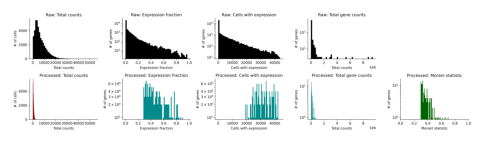

In [4]:
from spared.plotting import plot_histograms

plot_histograms(processed_adata=data.adata, raw_adata=raw_adata, path=os.path.join(inv_folder_path, 'filtering_histograms.png'))

# Load the saved image
image_path = os.path.join(inv_folder_path, 'filtering_histograms.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

### Function: `plot_random_patches` 

The `plot_random_patches`  function generates a grid of 16 random image patches extracted from the processed dataset. This helps to visualize the types of patches and their variations, providing insights into the data quality and diversity.

#### <u>Parameters:</u>
* **dataset(str):** The name of the dataset.
* **processed_adata (ad.AnnData):** The processed and filtered AnnData object ready for model usage.
* **path (str):** The path to save the image.
* **patch_size:** The size of the patches (default is 224).

##### <u>Returns:</u>

This function does not return any value. It saves the generated image with the random patches at the specified path.

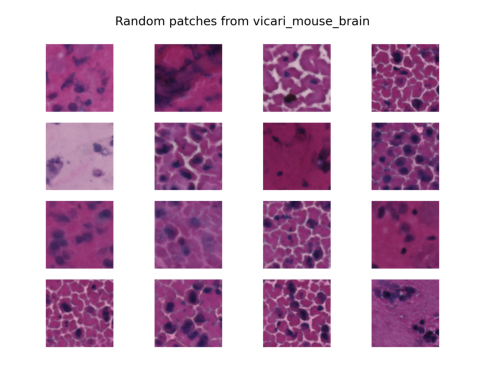

In [5]:
from spared.plotting import plot_random_patches

plot_random_patches(dataset=data.dataset, processed_adata=adata, path=os.path.join(inv_folder_path, 'random_patches.png'), patch_size=data.patch_size)

# Load the saved image
image_path = os.path.join(inv_folder_path, 'random_patches.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

### Function: `visualize_moran_filtering`

The `visualize_moran_filtering` function visualizes the spatial expression of the top 4 most or least auto-correlated genes in the processed AnnData object, providing insights into the spatial distribution and variability of gene expression across slides.

#### <u>Parameters:</u>
* **param_dict (dict):** Dictionary with dataset parameters.
* **processed_adata (ad.AnnData):** Processed and filtered data ready to use by the model.
* **from_layer (str):** Layer of the AnnData object to use for plotting.
* **path (str):** Path to save the generated image.
* **split_names (dict):** Dictionary containing split names.
* **top (bool, optional):** If True, the top 4 most auto-correlated genes are visualized. If False, the top 4 least auto-correlated genes are visualized. Defaults to True.

#### <u>Returns:</u>
This function does not return any value. It saves the generated plots as an image at the specified path.

### Explanation

The `visualize_moran_filtering` function generates spatial plots of the top 4 most (image in the left) and least (image in the right) auto-correlated genes in the dataset. Moran's I statistic is used to measure the spatial autocorrelation of gene expression, indicating how similar or dissimilar the expression levels are in neighboring spots. High values of Moran's I indicate strong spatial autocorrelation (genes tend to be expressed similarly in neighboring spots), while low values indicate weak spatial autocorrelation.

#### Importance of Moran's I in Spatial Transcriptomics

Moran's I is a crucial statistic in spatial transcriptomics as it quantifies the degree to which gene expression patterns are spatially clustered or dispersed across a tissue sample. This measure helps identify genes that exhibit significant spatial structure, which can be indicative of underlying biological processes. Understanding these spatial patterns is essential for interpreting the functional architecture of tissues and can provide insights into how gene expression influences cellular behavior in different regions of the tissue.

Plotting slides were None or missing in the dataset. And there are more than 4 slides. Setting slides internally from all splits: V11L12-038_C1,V11T16-085_D1,V11T17-101_A1,V11L12-038_A1


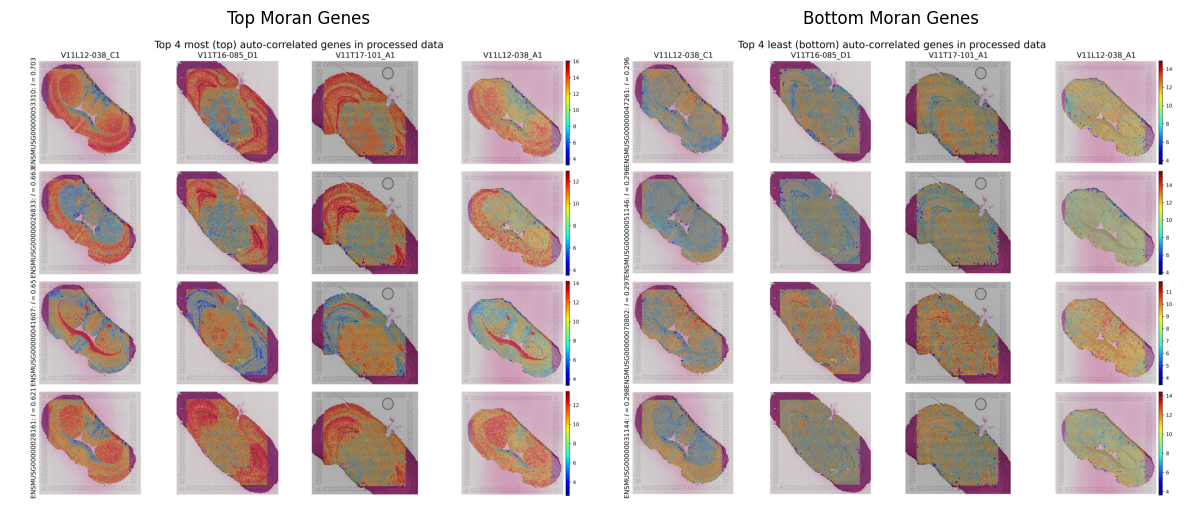

In [6]:
# Creat folder for top and bottom moran genes
os.makedirs(os.path.join(inv_folder_path, 'top_moran_genes'), exist_ok=True)
os.makedirs(os.path.join(inv_folder_path, 'bottom_moran_genes'), exist_ok=True)
# Define the layer
layer = 'c_d_log1p'

from spared.plotting import visualize_moran_filtering

visualize_moran_filtering(param_dict=param_dict, processed_adata=adata, from_layer=layer, path=os.path.join(inv_folder_path, 'top_moran_genes', f'{layer}.png'), split_names=data.split_names, top = True)
visualize_moran_filtering(param_dict=param_dict, processed_adata=adata, from_layer=layer, path = os.path.join(inv_folder_path, 'bottom_moran_genes', f'{layer}.png'), split_names=data.split_names, top = False)

# Load the saved image
image_path_top = os.path.join(inv_folder_path, 'top_moran_genes', f'{layer}.png')
img_top = im.imread(image_path_top)

image_path_bot = os.path.join(inv_folder_path, 'bottom_moran_genes', f'{layer}.png')
img_bot = im.imread(image_path_bot)

# Display the image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(img_top)
ax[0].axis('off')
ax[0].set_title('Top Moran Genes')

ax[1].imshow(img_bot)
ax[1].axis('off')
ax[1].set_title('Bottom Moran Genes')

plt.tight_layout()
plt.show()


### Function: `visualize_gene_expression`

The `visualize_gene_expression` function generates a plot of gene expression levels for specific genes across different slides in the processed spatial transcriptomics data.

##### <u>Parameters:</u>

* **param_dict (dict):** Dictionary containing dataset parameters.
* **processed_adata (ad.AnnData):** The processed and filtered AnnData object with the patient collection.
* **from_layer (str):** The layer of the data to plot from the AnnData object.
* **path (str):** Path to save the generated plot.
* **split_names (dict):** Dictionary containing split names.

##### <u>Returns:</u>

This function does not return any value. It saves the generated plot as an image at the specified path.

### Explanation

The visualize_gene_expression function plots the spatial expression of specific genes across various slides in the dataset. The function selects genes and slides based on the provided parameters, or it chooses randomly if none are specified. The resulting plot helps visualize how these genes are expressed spatially within the tissue samples.

#### Representation in the Output Image
The output image is a grid of plots where each row corresponds to a different gene and each column corresponds to a different slide. The color intensity in each subplot represents the expression level of the gene in that particular slide region (blue and red represent low and high expression levels respectively). Each subplot is labeled with the gene name and its Moran's I value, providing context for the spatial structure of the gene expression.

Could not find all the specified plotting genes, choosing randomly


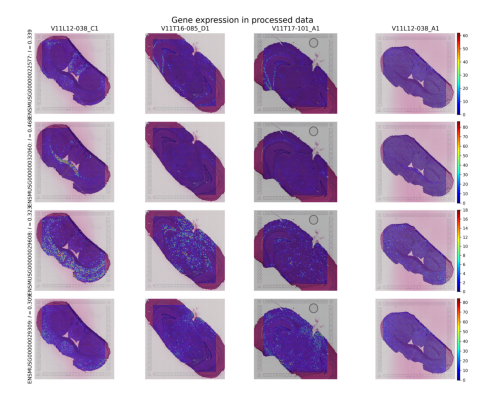

In [8]:
# creat folder for expression plots
os.makedirs(os.path.join(inv_folder_path, 'expression_plots'), exist_ok=True)
# Define the layer
layer = 'counts'

from spared.plotting import visualize_gene_expression

visualize_gene_expression(param_dict=param_dict, processed_adata=adata, from_layer=layer, path=os.path.join(inv_folder_path,'expression_plots', f'{layer}.png'), split_names=data.split_names)

# Load the saved image
image_path = os.path.join(inv_folder_path,'expression_plots', f'{layer}.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

### Funtion: `plot_clusters`

The `plot_clusters` function visualizes clusters spatially within the dataset. It generates a comprehensive plot that includes the spatial distribution of Leiden clusters in specific slides, UMAP embeddings for each slide and the entire dataset, and PCA embeddings. This function provides a detailed view of how clusters are distributed across the tissue samples. Additionally, this function provides visual information to conclude how well the batch correction has been applied to the data. 

##### <u>Parameters:</u>

* **dataset (str):** The name of the dataset.
* **param dict (dict):** Dictionary with dataset parameters.
* **processed_adata (ad.AnnData):** Processed and filtered data ready to use by the model.
* **from_layer (str):** The key in adata.layers where the expression matrix is stored.
* **path (str):** Path to save the image.
* **split_names (dict):** Dictionary containing split names.

##### <u>Returns:</u>

This function does not return any value. It saves the generated cluster visualization plot as an image at the specified path.

### Explanation
In spatial transcriptomics, batch effects can introduce unwanted variability in gene expression data that does not correspond to biological differences but rather to technical or experimental variations. These batch effects can arise from differences in sample preparation, sequencing runs, or other experimental conditions. Correcting for these batch effects is crucial to ensure that the analysis focuses on true biological variations rather than technical artifacts. The goal of the `plot_clusters` function is to visualize how well the batch correction has been applied. This involves visualizing the clustering and embedding after batch correction to see if the data from different batches are correclty integrated and not segregated by batch effects.

### Understanding the plots

#### Spatial Distribution of Clusters 
The leftmost column of each subplot shows the spatial distribution of clusters within individual slides. This visualization helps to see how clusters (representing different spots) are distributed spatially within the tissue.

In the **provided example**, the clusters are distinct and well-separated within each tissue sample, indicating that the clustering captures meaningful biological variations in gene expression within the tissue samples.

#### UMAP Embeddings
UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique used to visualize high-dimensional data in a 2D or 3D space. 

##### <u>UMAP per Slide</u>
In the middle column, each individual slide's data is projected into a UMAP space, colored by clusters. This helps to see the local structure of clusters within each slide. 

In the **provided example**, the clusters are visually distinct within each slide, suggesting that the clustering algorithm has identified meaningful groups of spots with similar gene expression profiles. Adittionally, the spatial structure is well-preserved.

##### <u>UMAP of Complete Dataset with Leiden Clusters</u>
In the rightmost column (top plot) the entire dataset is projected into a UMAP space. The combined dataset UMAP embedding shows all tissue samples colored by Leiden clusters. Ideally, after batch correction, spots with similar expression profiles from different slides should cluster together regardless of their slide of origin.

In the **provided example**, the overall UMAP embedding shows that clusters are well-separated and consistent across different slides. This indicates that the clusters are robust and not driven by batch effects.

##### <u>UMAP & Patient</u>
In the rightmost column (middle plot) the UMAP embedding of the entire dataset colored by slide is visualized.

In the **provided example** the data points are well-mixed across different slides (patients), suggesting that the batch correction has effectively integrated the data from different slides. There are no clear separations by slides, indicating reduced batch effects.

#### PCA Embeddings
PCA (Principal Component Analysis) is another dimensionality reduction technique. The PCA embedding of the entire dataset is shown to visualize the global structure of the data.

Similar to the UMAP & Patient plot, the PCA embedding from the **provided example** shows that data points from different patients are well-integrated. This further supports the effectiveness of the batch correction.

### Importance
These visualizations provide a comprehensive understanding of the spatial and high-dimensional structure of the dataset. Adittionally, the vidualizations demonstrate that the clustering is robust and that the batch correction has effectively minimized technical variations, allowing for meaningful biological interpretations of the spatial transcriptomics data. 

Plotting slides were None or missing in the dataset. And there are more than 4 slides. Setting slides internally from all splits: V11L12-038_D1,V11T16-085_D1,V11T17-101_A1,V11L12-109_A1


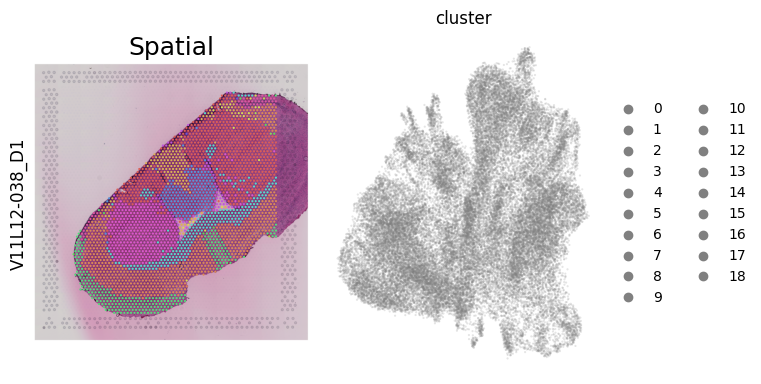

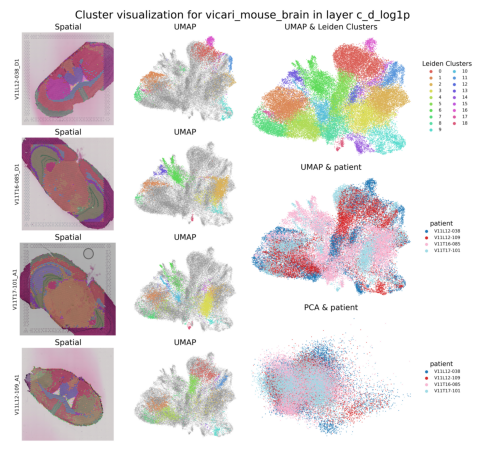

In [4]:
# Create folder to save cluster plots
os.makedirs(os.path.join(inv_folder_path, 'cluster_plots'), exist_ok=True)
# Define layer
layer = 'c_d_log1p'

from spared.plotting import plot_clusters

plot_clusters(dataset=data.dataset, param_dict=param_dict, processed_adata=adata, from_layer=layer, path=os.path.join(inv_folder_path, 'cluster_plots', f'{layer}.png'), split_names=data.split_names)

# Load the saved image
image_path = os.path.join(inv_folder_path, 'cluster_plots', f'{layer}.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()


### Function: `plot_mean_std` 

The `plot_mean_std` function visualizes the mean and standard deviation of gene expression levels across different layers of processed data and raw data, providing insights into the effects of filtering and processing on the dataset.

##### <u>Parameters:</u>

* **dataset (str):** The name of the dataset.
* **processed_adata (ad.AnnData):** Processed and filtered data ready to use by the model.
* **raw_adata (ad.AnnData):** Data loaded from a .h5ad file that is not filtered but includes patch information.
* **path (str):** The path to save the generated plot.

##### <u>Returns:</u>

This function does not return any value. It saves the generated scatter plot as an image at the specified path.

### Explanation
The `plot_mean_std` function generates a scatter plot that compares the mean and standard deviation of gene expression levels in raw and processed data. This comparison helps in understanding how different processing steps affect the distribution of gene expression values.

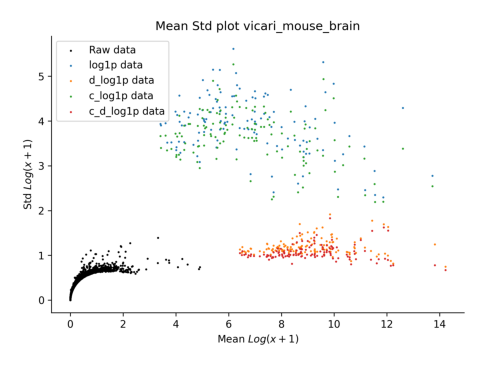

In [5]:
from spared.plotting import plot_mean_std

plot_mean_std(dataset=data.dataset, processed_adata=adata, raw_adata=raw_adata, path=os.path.join(inv_folder_path, 'mean_std_scatter.png'))

# Load the saved image
image_path = os.path.join(inv_folder_path, 'mean_std_scatter.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

### Fuction: `plot_mean_std_partitions` 

The `plot_mean_std_partitions` function visualizes the mean and standard deviation of gene expression levels across different data splits (train, validation, test) within a specified layer of the processed data. This helps in assessing the tractability of the task by comparing the distribution of gene expression levels across different data splits.

##### <u>Parameters:</u>

* **dataset (str):** The name of the dataset.
* **processed_adata (ad.AnnData):** Processed and filtered data ready to use by the model.
* **from_layer (str):** The key in `adata.layers` where the expression matrix is stored.
* **path (str):** The path to save the generated plot.

##### <u>Returns:</u>

This function does not return any value. It saves the generated scatter plot as an image at the specified path.

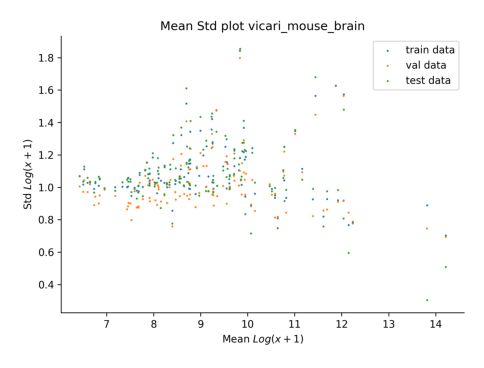

In [6]:
# Create folder to save mean and std partition plots
os.makedirs(os.path.join(inv_folder_path, 'mean_vs_std_partitions'), exist_ok=True)
# Define layer
layer = 'c_d_log1p'

from spared.plotting import plot_mean_std_partitions

plot_mean_std_partitions(dataset=data.dataset, processed_adata=adata, from_layer=layer, path=os.path.join(inv_folder_path, 'mean_vs_std_partitions', f'{layer}.png'))

# Load the saved image
image_path = os.path.join(inv_folder_path, 'mean_vs_std_partitions', f'{layer}.png')
img = im.imread(image_path)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

### Function: `plot_tests` 

The `plot_tests` function systematically calls all the plotting functions provided in the **plotting SpaRED library** to generate quality control plots, which are saved in a designated folder. These plots provide a comprehensive overview of the dataset's quality and the effectiveness of the preprocessing steps.

##### <u>Parameters:</u>

* **patch_size (int):** The size of the patches to be plotted (default is 224).
* **dataset (str):** The name of the dataset.
* **split_names (dict):** A dictionary containing split names.
* **param_dict (dict):** A dictionary containing dataset parameters. 
* **folder_path (str):** The path to save the quality control plots.
* **processed_adata (ad.AnnData):** Processed and filtered data ready to use by the model.
* **raw_adata (ad.AnnData):** Unfiltered and unprocessed AnnData object representing the slide collection. 

##### <u>Returns:</u>

This function does not return any value. It saves the generated quality control plots as images in the specified folder.

In [ ]:
# Create folder to save all plots
folder_path="/home/dvegaa/spared/docs/all_plots/vicari_mouse_brain"
os.makedirs(folder_path, exist_ok=True)

from spared.plotting import plot_tests

plot_tests(patch_size=data.patch_size, dataset=data.dataset, split_names=data.split_names, param_dict=param_dict, folder_path=folder_path, processed_adata=adata, raw_adata=raw_adata)
